map projections, CRS, basics of Geopandas

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

Resources:

- source for World borders https://www.geobounaries.org/
    https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip
    - comment: https://twitter.com/gontsa/status/1459617768651857924?s=20

- EPSG website: https://epsg.io/
- Ukraine area: 603 628 km²

In [2]:
import os
os.chdir(r'd:\git20\GeoPython_Ukraine2024')

In [3]:
url = 'https://github.com/wmgeolab/geoBoundaries/raw/main/releaseData/CGAZ/geoBoundariesCGAZ_ADM0.zip'

In [4]:
import requests, zipfile, io
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [5]:
z.namelist()

['geoBoundariesCGAZ_ADM0.shp',
 'geoBoundariesCGAZ_ADM0.shx',
 'geoBoundariesCGAZ_ADM0.dbf',
 'geoBoundariesCGAZ_ADM0.prj']

In [6]:
# read data about the countries
# r'd:\GIS\2024_workshops\geoBoundariesCGAZ_ADM0.shp'

gdf_countries = gpd.read_file(z.namelist()[0])

In [7]:
gdf_countries.head(5)

,shapeGroup,shapeType,shapeName,geometry
0,AFG,ADM0,Afghanistan,"POLYGON ((74.88986 37.23409, 74.88962 37.23314..."
1,GBR,ADM0,United Kingdom,"MULTIPOLYGON (((33.01302 34.64377, 33.01275 34..."
2,ALB,ADM0,Albania,"POLYGON ((20.07889 42.55580, 20.07928 42.55546..."
3,DZA,ADM0,Algeria,"POLYGON ((8.64194 36.94096, 8.64195 36.94070, ..."
4,USA,ADM0,United States,"MULTIPOLYGON (((-168.15791 -14.53181, -168.161..."


In [8]:
# single polygons and multipolygons

In [9]:
gdf_countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shapeGroup  218 non-null    object  
 1   shapeType   218 non-null    object  
 2   shapeName   218 non-null    object  
 3   geometry    218 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 6.9+ KB


In [10]:
gdf_countries.total_bounds
# gdf_countries.geometry.area.sum()
# gdf_countries.geometry.centroid.plot()

array([-180.        ,  -90.        ,  180.        ,   83.63339233])

<AxesSubplot:>

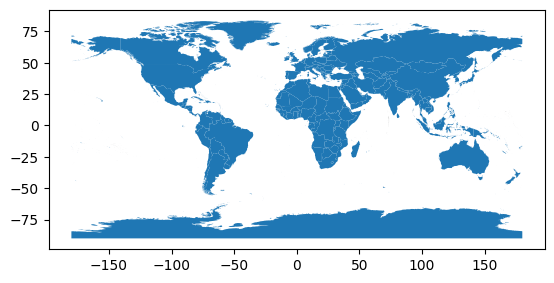

In [11]:
# Simple plot - Eqirctangular projection
gdf_countries.plot()

In [12]:
gdf_countries.crs
# look to the slides

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

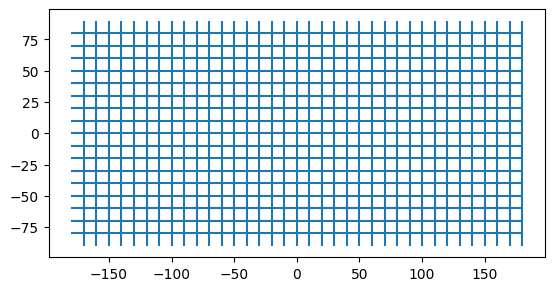

In [13]:
# Add additional spatial data
# (r'.\data\graticules_10.shp')
gdf_graticules = gpd.read_file(r'data\graticules_10.shp')
gdf_graticules.plot()
gdf_graticules.crs

In [14]:
gdf_graticules.crs == gdf_countries.crs

True

Text(0.5, 1.0, 'Eqiurectangular projection')

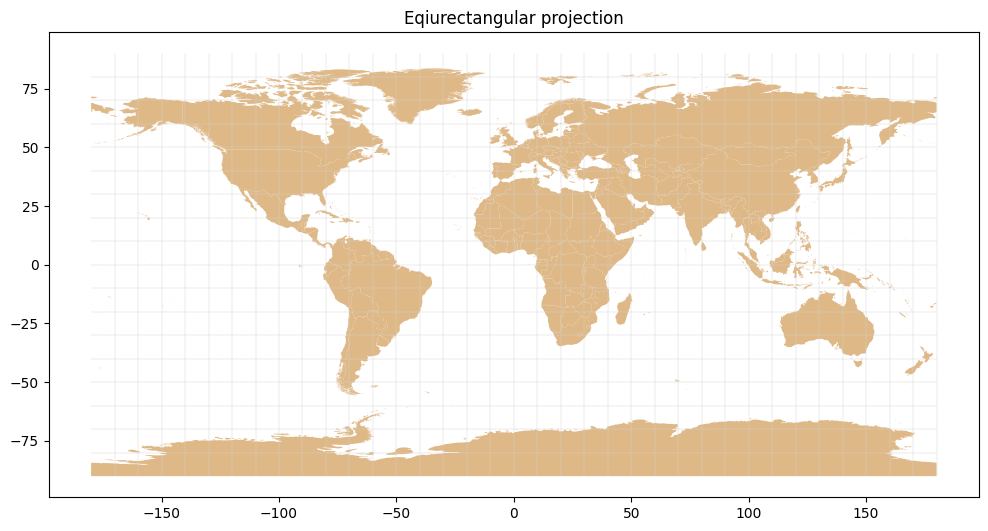

In [15]:
# overlay - fig and ax objects - we can overlay spatial layers when we have the same CRS 

fig, ax = plt.subplots(figsize=(12,10))
gdf_countries.plot(ax=ax, color='burlywood')
gdf_graticules.plot(ax=ax, color='lightgray', linewidth=0.3)
plt.title('Eqiurectangular projection', color='black')
# ax.axis('off')

In [16]:
# equirectangular projection cons - distortions, units
gdf_countries.geometry.area.sum()

C:\Users\Airly\AppData\Local\Temp\ipykernel_3276\428466332.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_countries.geometry.area.sum()


21432.176517135034

Text(0.5, 1.0, 'Eqiurectangular projection')

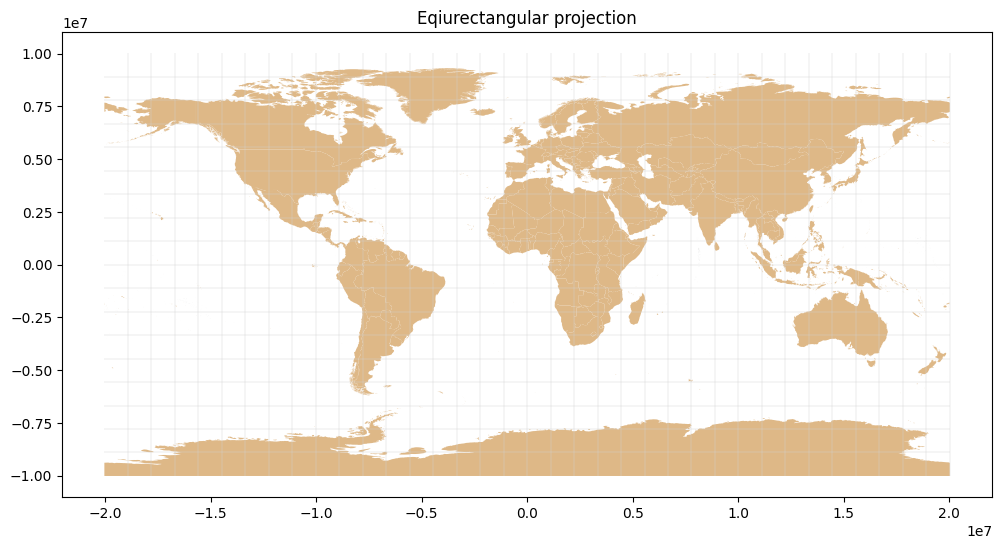

In [17]:
# units fix EPSG:32662 - Platte Carre  - just changing the units
fig, ax = plt.subplots(figsize=(12,10))
gdf_countries.to_crs('EPSG:32662').plot(ax=ax, color='burlywood')
gdf_graticules.to_crs('EPSG:32662').plot(ax=ax, color='lightgray', linewidth=0.3)
plt.title('Eqiurectangular projection', color='black')
# ax.axis('off')

# gdf_countries.to_crs('EPSG:32662').geometry.area.sum() /1_000_000

In [18]:
# equirectangular projection cons - distortions, units
gdf_countries[gdf_countries.shapeName =='Poland'].to_crs('EPSG:32662').geometry.area.sum() / 1_000_000

507375.2519368409

Mollweide - equal area projection 'ESRI:54009'

In [19]:
def plot_world_graticule(epsg, title='', ylim=(0,0)):
    fig, ax = plt.subplots(figsize=(12,10))
    gdf_countries.to_crs(epsg).plot(ax=ax, color='burlywood')
    gdf_graticules.to_crs(epsg).plot(ax=ax, color='gray', linewidth=0.1)
    ax.axis('off')
    ax.set_title(title)
    if ylim!=(0,0):
        ax.set_ylim(ylim)


311414.5292391513

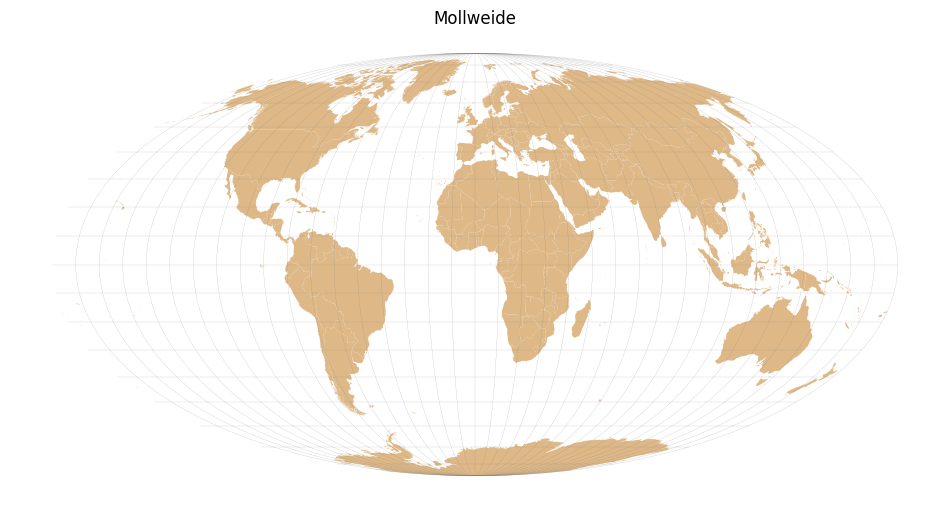

In [20]:
plot_world_graticule('ESRI:54009', title='Mollweide')
gdf_countries[gdf_countries.shapeName =='Poland'].to_crs('ESRI:54009').geometry.area.sum() / 1_000_000

Mercator projection 'EPSG:3857'
- equal directions projection

827422.2271975665

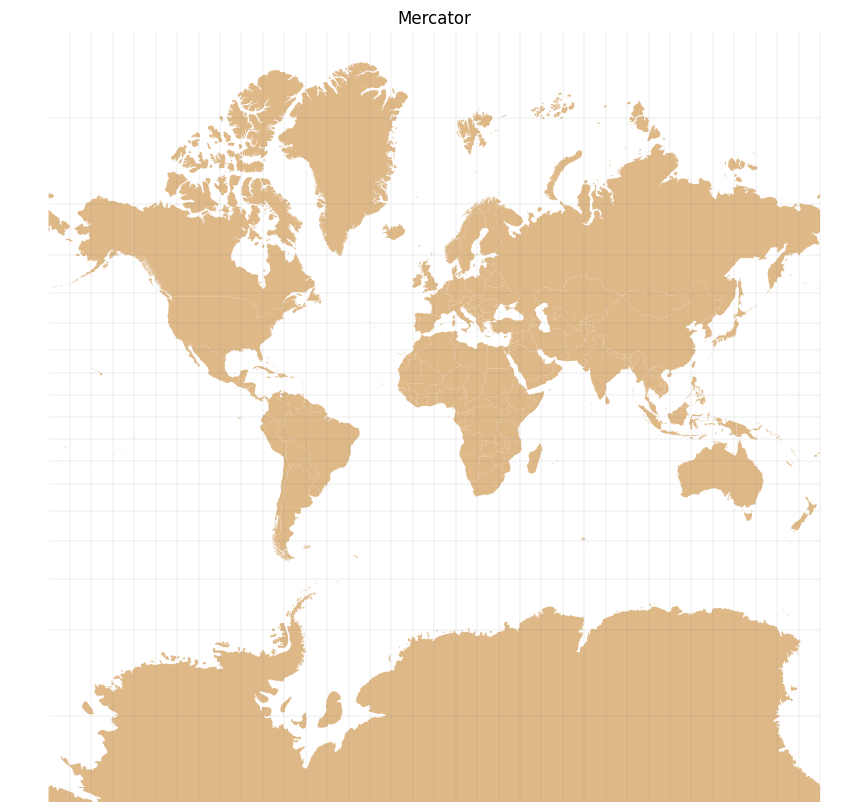

In [21]:
epsg = 'EPSG:3857'
plot_world_graticule(epsg, title='Mercator', ylim=(-20_000_000, 20_000_000))
gdf_countries[gdf_countries.shapeName =='Poland'].to_crs(epsg).geometry.area.sum() / 1_000_000

Robinson ('ESRI:54030')

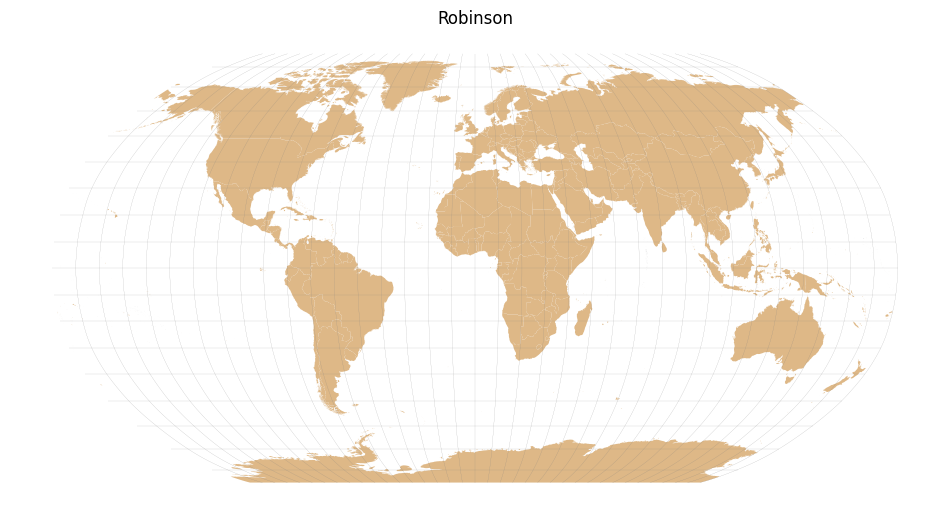

In [22]:
plot_world_graticule('ESRI:54030', title='Robinson')

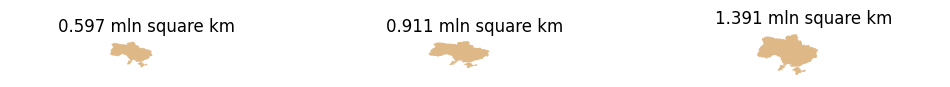

In [23]:
# Displaying Greenland (or Ukraine) in different projections, in the same scale

list_epsg=['ESRI:54009', 'EPSG:32662', 'EPSG:3785']

fig, axs = plt.subplots(1, len(list_epsg), figsize=(len(list_epsg)*4,8))

for ax, epsg in zip(axs, list_epsg):
    gdf_cntr = gdf_countries[gdf_countries.shapeName=='Ukraine']
    gdf_cntr = gdf_cntr.to_crs(epsg)
    gdf_cntr.plot(ax=ax, color='burlywood', linewidth=0)
    ax.axis('off')
    ax.set_title(f'{round(gdf_cntr.geometry.area.values[0]/1_000_000_000_000, 3)} mln square km')
    ax.set_xlim(int(gdf_cntr.centroid.x.iloc[0]) - 4_000_000, int(gdf_cntr.centroid.x.iloc[0]) + 5_000_000)


distances on a plane - more difficult matter

In [46]:
import shapely
from shapely.geometry import Point, LineString

# distance - from Kiev to New York
kyiv_coordinates = (30.52, 50.45)
ny_coordinates = (-73.94, 40.76)

In [47]:
point_kyiv = Point(30.52, 50.45)
point_ny = Point(-73.94, 40.76)

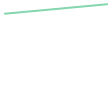

In [48]:
linia = LineString([point_kyiv, point_ny])
linia

In [49]:
gdf_linia = gpd.GeoDataFrame(geometry=[linia], crs='epsg:4326')
print(gdf_linia.to_crs('ESRI:54009').geometry.length/1000, 
    gdf_linia.to_crs('EPSG:3857').geometry.length/1000)

0    8606.878728
dtype: float64 0    11730.961165
dtype: float64


In [50]:
# TODO show whole geometry - then show how the segmentize work
gdf_linia.geometry

0    LINESTRING (30.52000 50.45000, -73.94000 40.76...
Name: geometry, dtype: geometry

The Azimuthal Equidistant (AEQD) projection is a type of map projection that portrays all points on the Earth's surface as equidistant from the center point, with distances measured accurately from that center point. Here are some characteristics and considerations of the Azimuthal Equidistant projection:

(f'+proj=aeqd +datum=WGS84 +units=m +lat_0=0.0 +lon_0=0.0')

In [57]:
crs_orig_point = (f'+proj=aeqd +datum=WGS84 +units=m +lat_0={point_kyiv.y} +lon_0={point_kyiv.x}') #  full CRS definition
gdf_linia_init_crs = gdf_linia.set_crs('EPSG:4326')
gdf_linia_out_crs = gdf_linia_init_crs.to_crs(crs_orig_point)
gdf_linia_out_crs = shapely.segmentize(gdf_linia_out_crs, 5) # important to add vertices
gdf_linia_out_crs.set_crs(crs_orig_point, inplace=True)
gdf_linia_out_crs.geometry.length/1000

0    7523.966254
dtype: float64

(-16202833.720475351,
 19309647.77733567,
 -18909718.27737411,
 18801850.650062174)

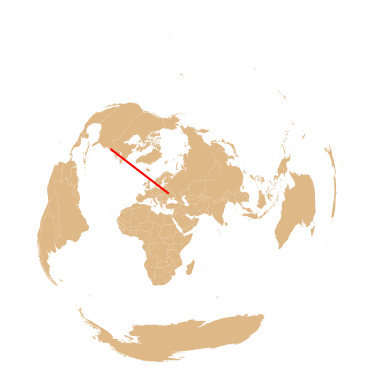

In [58]:
# plot a kyiv centred map
gdf_countries_azimut = gdf_countries.to_crs(crs_orig_point)
graticules_azimut = gdf_graticules.to_crs(crs_orig_point)

fig, ax = plt.subplots()
gdf_countries_azimut.plot(ax=ax, color='burlywood')
gdf_linia_out_crs.plot(ax=ax, color='red')
ax.axis('off')

how the great circles look in popular map projections?

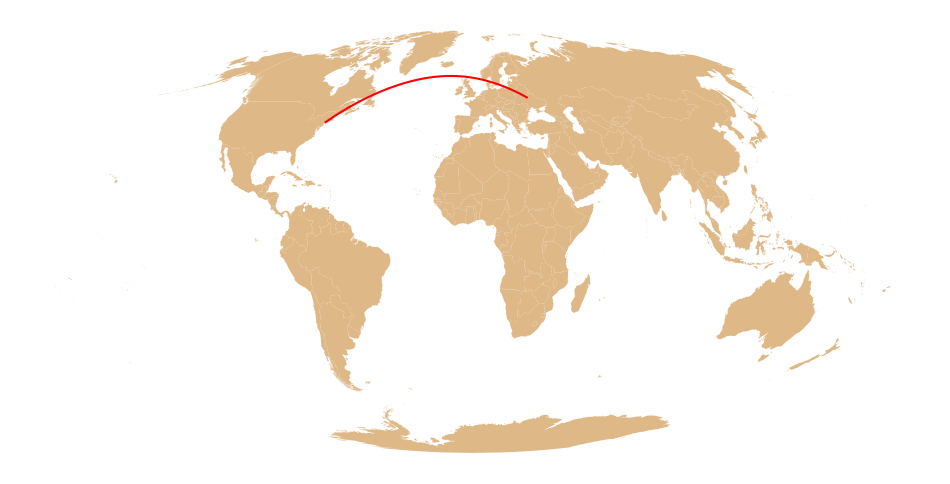

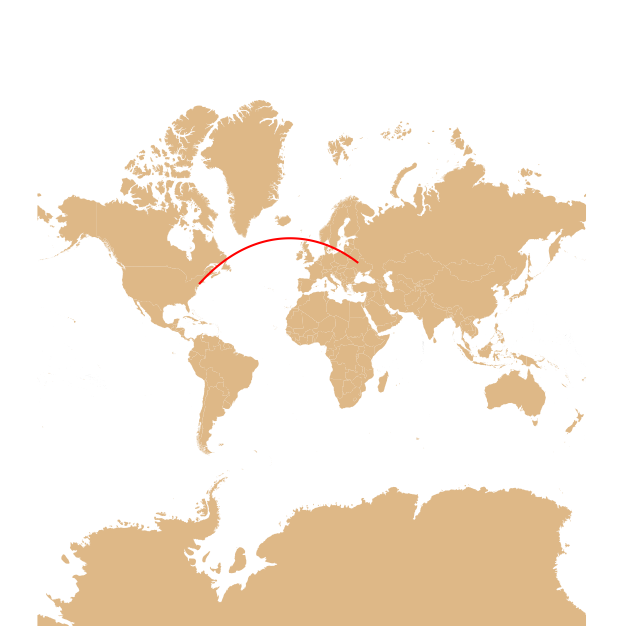

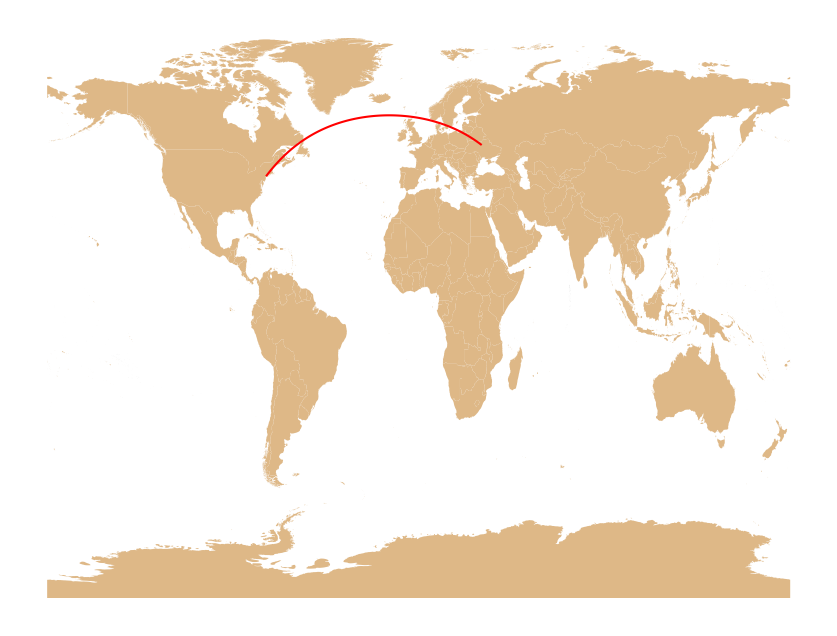

In [65]:
crss = ['ESRI:54009', 'EPSG:3857', 'EPSG:4326']
for crs in crss:
    fig, ax = plt.subplots(figsize=(12,8))
    gdf_countries_moll = gdf_countries.to_crs(crs)
    gdf_countries_moll.plot(ax=ax, color='burlywood')
    gdf_linia_out_crs.to_crs(crs).plot(ax=ax, linewidth=1.5, color='red')

    ax.axis('off')
    if crs == 'EPSG:3857':
        ax.set_ylim(-20_000_000, 25_000_000)